pandas                        1.4.2
numpy                         1.21.5
matplotlib                    3.5.1
matplotlib-inline             0.1.2
scipy                         1.7.3
seaborn                       0.11.2
statsmodels                   0.13.2

In [1]:
pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.2.0
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.9.0
anaconda-navigator            2.1.4
anaconda-project              0.10.2
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backpor

QtAwesome                     1.0.3
qtconsole                     5.3.0
QtPy                          2.0.1
queuelib                      1.5.0
regex                         2022.3.15
requests                      2.27.1
requests-file                 1.5.1
requests-oauthlib             1.3.1
rope                          0.22.0
rsa                           4.7.2
Rtree                         0.9.7
ruamel-yaml-conda             0.15.100
s3transfer                    0.5.0
scikit-image                  0.19.2
scikit-learn                  1.1.2
scikit-learn-intelex          2021.20220215.102710
scipy                         1.7.3
Scrapy                        2.6.1
seaborn                       0.11.2
Send2Trash                    1.8.0
service-identity              18.1.0
setuptools                    61.2.0
sip                           4.19.13
six                           1.16.0
smart-open                    5.1.0
sniffio                       1.2.0
snowballstemmer               2.2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
log_cluster = pd.read_csv('log_cluster_final.csv')
user_cluster = pd.read_csv('user_cluster_final.csv')


In [3]:
user_log_merge = pd.merge(left=user_cluster, right=log_cluster,
         left_on=['user_id', 'loanapply_insert_time'], right_on=['user_id', 'date'],
         how='inner')
# 필요 없는 변수 제거
user_log_merge.drop(['user_id', 'loanapply_insert_time', 'date'], axis=1, inplace=True)

In [4]:
data=user_log_merge[user_log_merge['cluster']==1]

In [5]:
data

,birth_year,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,existing_loan_cnt,existing_loan_amt,gender,time,cluster,count
6,40,580.0,39000000.0,EARNEDINCOME,정규직,기타가족소유,3000000.0,생활비,2.0,55000000.0,0.0,499,1,3
12,20,670.0,26000000.0,EARNEDINCOME,정규직,전월세,3000000.0,대환대출,1.0,3000000.0,1.0,407,1,4
19,30,920.0,31000000.0,EARNEDINCOME,정규직,기타가족소유,30000000.0,생활비,3.0,36000000.0,1.0,434,1,2
25,40,840.0,70000000.0,EARNEDINCOME,정규직,자가,100000000.0,생활비,6.0,148000000.0,0.0,419,1,2
29,30,950.0,48000000.0,PRIVATEBUSINESS,정규직,전월세,80000000.0,사업자금,1.0,130000000.0,0.0,800,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96907,30,1000.0,31000000.0,EARNEDINCOME,정규직,전월세,50000000.0,생활비,1.0,18000000.0,1.0,263,1,2
96908,50,680.0,35000000.0,FREELANCER,기타,자가,30000000.0,대환대출,2.0,108000000.0,0.0,1512,1,2
96909,30,750.0,30000000.0,FREELANCER,기타,전월세,20000000.0,대환대출,2.0,14000000.0,1.0,1304,1,2
96911,20,790.0,10000000.0,OTHERINCOME,기타,기타가족소유,4000000.0,대환대출,1.0,0.0,1.0,310,1,3


# k-means
왜곡이 높은 데이터 세트에 k-means 적용하면 중심 개수를 증가시키더라도 변별력이 떨어지는 군집화가 수행되기 떄문에 데이터 값에
로그변환, 지수변환을 수행하여 왜곡정도를 낮춘 뒤, k-means 수행

array([[<AxesSubplot:title={'center':'birth_year'}>,
        <AxesSubplot:title={'center':'credit_score'}>,
        <AxesSubplot:title={'center':'yearly_income'}>],
       [<AxesSubplot:title={'center':'desired_amount'}>,
        <AxesSubplot:title={'center':'existing_loan_cnt'}>,
        <AxesSubplot:title={'center':'existing_loan_amt'}>],
       [<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'time'}>,
        <AxesSubplot:title={'center':'cluster'}>],
       [<AxesSubplot:title={'center':'count'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

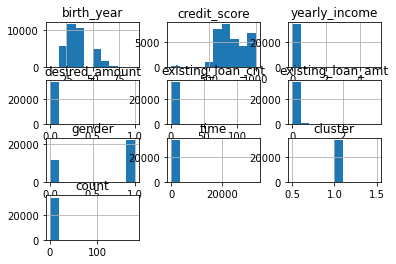

In [6]:
data.hist()

###  yearly_income, desired_amount, 'existing_loan_amt','existing_loan_cnt', time 변환 필요

<AxesSubplot:>

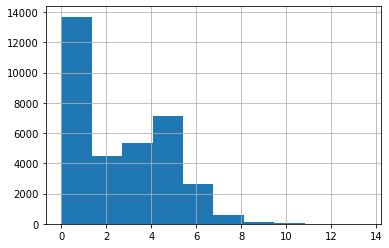

In [7]:
np.sqrt(np.sqrt(data['time'])).hist()

<AxesSubplot:>

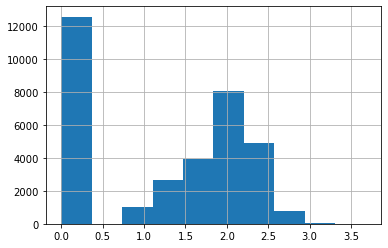

In [8]:
np.sqrt(np.sqrt(np.sqrt(data['time']))).hist()

<AxesSubplot:>

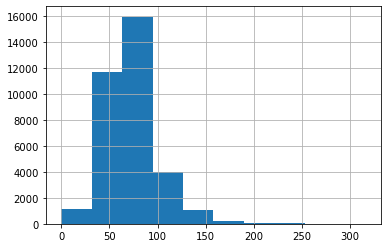

In [9]:
np.sqrt(np.sqrt(data['desired_amount'])).hist()

<AxesSubplot:>

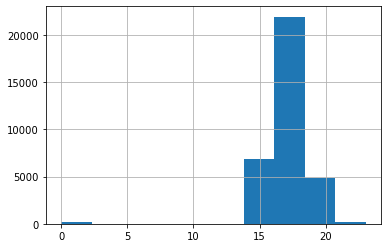

In [10]:
np.log1p(data['desired_amount']).hist()

<AxesSubplot:>

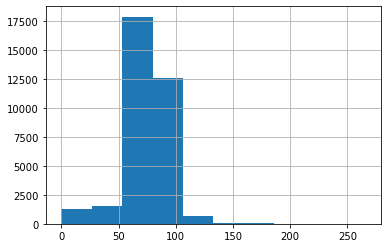

In [11]:
np.sqrt(np.sqrt(data['yearly_income'])).hist()

<AxesSubplot:>

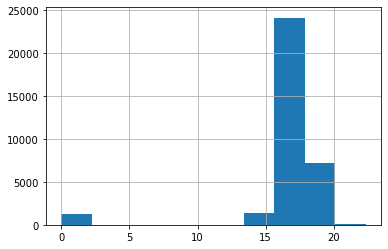

In [12]:
np.log1p(data['yearly_income']).hist()

<AxesSubplot:>

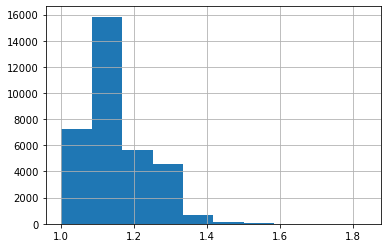

In [13]:
np.sqrt(np.sqrt(np.sqrt(data['existing_loan_cnt']))).hist()

<AxesSubplot:>

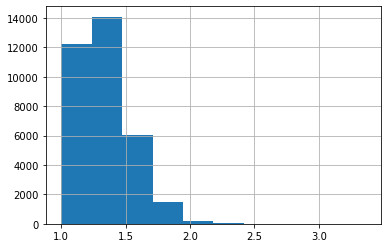

In [14]:
np.sqrt(np.sqrt(data['existing_loan_cnt'])).hist()

<AxesSubplot:>

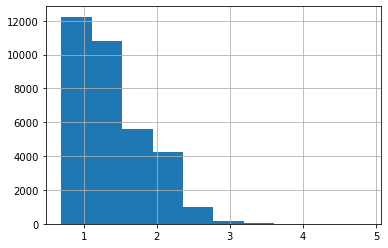

In [15]:
np.log1p(data['existing_loan_cnt']).hist()

<AxesSubplot:>

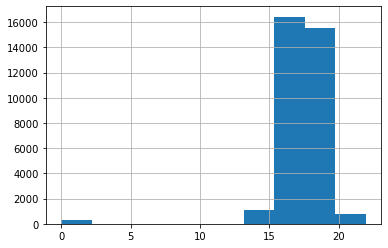

In [16]:
np.log1p(data['existing_loan_amt']).hist()

<AxesSubplot:>

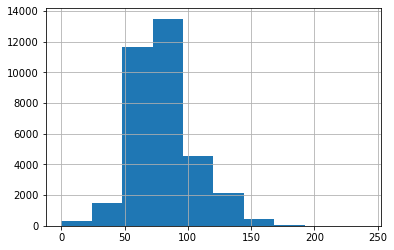

In [17]:
np.sqrt(np.sqrt(data['existing_loan_amt'])).hist()

<AxesSubplot:>

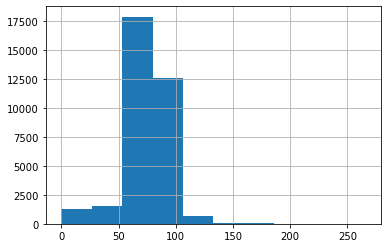

In [18]:
np.sqrt(np.sqrt(data['yearly_income'])).hist()

In [19]:
import datetime
import math
import matplotlib.pyplot as plt
%matplotlib inline

## 데이터 지정
data : 원래 데이터
data1 : 카테고리형으로 타입 바꿈
data2 : 더미화함
df : 스케일링하고 더미화함
df2 : 스케일링하고 더미안함

In [20]:
#data1[['income_type','employment_type','houseown_type','purpose']]=data[['income_type','employment_type','houseown_type','purpose']].astype('category')
data1=data.copy()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data1['income_type']=le.fit_transform(data1['income_type'])
data1['employment_type']=le.fit_transform(data1['employment_type'])
data1['houseown_type']=le.fit_transform(data1['houseown_type'])
data1['purpose']=le.fit_transform(data1['purpose'])

data1[['birth_year','gender']]=data1[['birth_year','gender']].astype('category')

#더미함
data2=pd.get_dummies(data1)
# 더미하고 스케일링
df=data2.copy()
df['time']=np.sqrt(np.sqrt(data2['time']))
df['desired_amount']=np.sqrt(data2['desired_amount'])
df['yearly_income']=np.sqrt(np.sqrt(data2['yearly_income']))
df['existing_loan_amt']=np.sqrt(data2['existing_loan_amt'])
df['existing_loan_cnt']=np.sqrt(np.sqrt(np.sqrt(data2['existing_loan_cnt'])))

# 더미안하고 스케일링
df2=data1.copy()
df2['time']=np.sqrt(np.sqrt(data1['time']))
df2['desired_amount']=np.sqrt(data1['desired_amount'])
df2['yearly_income']=np.sqrt(np.sqrt(data1['yearly_income']))
df2['existing_loan_amt']=np.sqrt(data1['existing_loan_amt'])
df2['existing_loan_cnt']=np.sqrt(np.sqrt(np.sqrt(data1['existing_loan_cnt'])))



In [21]:
data2

,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,existing_loan_cnt,existing_loan_amt,time,...,birth_year_20,birth_year_30,birth_year_40,birth_year_50,birth_year_60,birth_year_70,birth_year_80,birth_year_90,gender_0.0,gender_1.0
6,580.0,39000000.0,0,3,0,3000000.0,3,2.0,55000000.0,499,...,0,0,1,0,0,0,0,0,1,0
12,670.0,26000000.0,0,3,3,3000000.0,1,1.0,3000000.0,407,...,1,0,0,0,0,0,0,0,0,1
19,920.0,31000000.0,0,3,0,30000000.0,3,3.0,36000000.0,434,...,0,1,0,0,0,0,0,0,0,1
25,840.0,70000000.0,0,3,2,100000000.0,3,6.0,148000000.0,419,...,0,0,1,0,0,0,0,0,1,0
29,950.0,48000000.0,5,3,3,80000000.0,2,1.0,130000000.0,800,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96907,1000.0,31000000.0,0,3,3,50000000.0,3,1.0,18000000.0,263,...,0,1,0,0,0,0,0,0,0,1
96908,680.0,35000000.0,2,1,2,30000000.0,1,2.0,108000000.0,1512,...,0,0,0,1,0,0,0,0,1,0
96909,750.0,30000000.0,2,1,3,20000000.0,1,2.0,14000000.0,1304,...,0,1,0,0,0,0,0,0,0,1
96911,790.0,10000000.0,3,1,0,4000000.0,1,1.0,0.0,310,...,1,0,0,0,0,0,0,0,0,1


In [22]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성  
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

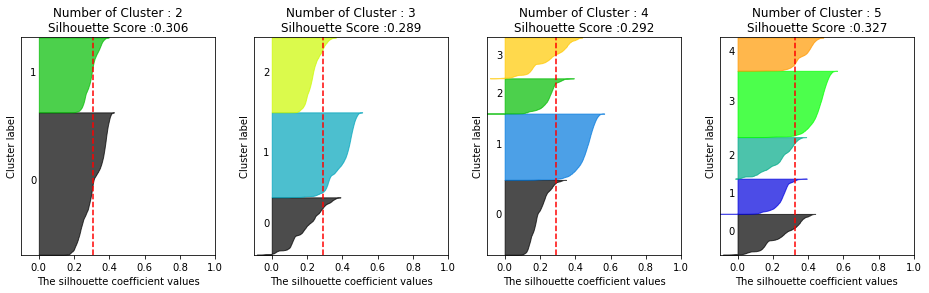

In [26]:
from sklearn.preprocessing import MinMaxScaler
X_features_scaled = MinMaxScaler().fit_transform(df2)
visualize_silhouette([2,3,4,5],X_features_scaled)

C:\Users\jus68\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


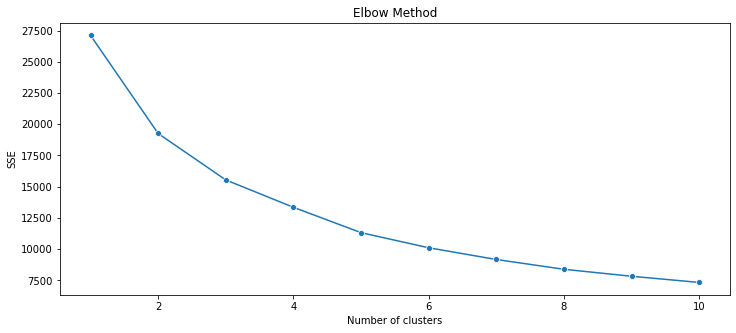

In [29]:
from sklearn.cluster import KMeans 
import seaborn as sns
# 3로 지정
SSE = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X_features_scaled)
    SSE.append(kmeans.inertia_)

#OPTIONAL: Elbow plot with cost (will take a LONG time)
plt.figure(figsize=(12,5))
sns.lineplot(range(1, 11), SSE,marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

# 직접적인 비교를 위해 기존데이터프레임에 합침

In [30]:
X_features_scaled = MinMaxScaler().fit_transform(df2)
kmeans = KMeans(n_clusters=3,random_state=42)
kmeans_label = kmeans.fit_predict(X_features_scaled)
cluster_df=data1.copy()
# 군집 레이블 추가
cluster_df["kmeans_minmax_label3"] = kmeans_label

In [31]:
cluster_df.groupby('kmeans_minmax_label3').apply(lambda x : x.describe())

credit_score  yearly_income   income_type  \
kmeans_minmax_label3                                                    
0                    count   9009.000000   9.009000e+03   9009.000000   
                     mean     747.101787   4.651904e+07      2.933733   
                     std      124.611308   1.196502e+08      1.643365   
                     min      100.000000   0.000000e+00      0.000000   
                     25%      650.000000   2.000000e+07      2.000000   
                     50%      730.000000   3.400000e+07      3.000000   
                     75%      840.000000   5.000000e+07      5.000000   
                     max     1000.000000   5.000000e+09      5.000000   
1                    count  13327.000000   1.332700e+04  13327.000000   
                     mean     764.226758   5.355331e+07      0.049148   
                     std      153.262143   8.191205e+07      0.218602   
                     min      100.000000   0.000000e+00      0.000000   
                     25%      630.000000   3.400000e+07      0.000000   
                     50%      750.000000   4.500000e+07      0.000000   
                     75%      920.000000   6.000000e+07      0.000000   
                     max     1000.000000   5.000000e+09      3.000000   
2                    count  11748.000000   1.174800e+04  11748.000000   
                     mean     725.959312   3.798672e+07      1.624617   
                     std      132.829829   9.613535e+07      1.781180   
                     min      100.000000   0.000000e+00      0.000000   
                     25%      620.000000   2.000000e+07      0.000000   
                     50%      690.000000   3.000000e+07      1.000000   
                     75%      830.000000   4.000000e+07      3.000000   
                     max     1000.000000   3.700000e+09      5.000000   

                            employment_type  houseown_type  desired_amount  \
kmeans_minmax_label3                                                         
0                    count      9009.000000    9009.000000    9.009000e+03   
                     mean          1.197025       1.879565    5.704529e+07   
                     std           0.925349       1.263925    2.899877e+08   
                     min           0.000000       0.000000    0.000000e+00   
                     25%           1.000000       0.000000    5.000000e+06   
                     50%           1.000000       2.000000    2.000000e+07   
                     75%           1.000000       3.000000    5.000000e+07   
                     max           3.000000       3.000000    1.000000e+10   
1                    count     13327.000000   13327.000000    1.332700e+04   
                     mean          2.976964       1.990996    8.122968e+07   
                     std           0.150023       1.143564    2.969257e+08   
                     min           2.000000       0.000000    0.000000e+00   
                     25%           3.000000       2.000000    1.000000e+07   
                     50%           3.000000       2.000000    3.000000e+07   
                     75%           3.000000       3.000000    7.000000e+07   
                     max           3.000000       3.000000    1.000000e+10   
2                    count     11748.000000   11748.000000    1.174800e+04   
                     mean          1.953439       1.900494    4.954460e+07   
                     std           1.102769       1.233478    1.865823e+08   
                     min           0.000000       0.000000    0.000000e+00   
                     25%           1.000000       0.000000    1.000000e+07   
                     50%           3.000000       2.000000    2.000000e+07   
                     75%           3.000000       3.000000    4.100000e+07   
                     max           3.000000       3.000000    9.000000e+09   

                                 purpose  existing_loan_cnt  \
kmeans_minmax_label3                 

In [32]:
first_mode=cluster_df.groupby('kmeans_minmax_label3').apply(lambda x : x.mode())
first_mode

,,birth_year,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,existing_loan_cnt,existing_loan_amt,gender,time,cluster,count,kmeans_minmax_label3
kmeans_minmax_label3,,,,,,,,,,,,,,,,
0,0,40,750.0,30000000.0,3,1,3,10000000.0,3,3.0,18000000.0,1.0,0,1,1,0
1,0,30,950.0,30000000.0,0,3,3,50000000.0,1,3.0,18000000.0,1.0,0,1,1,1
2,0,40,630.0,30000000.0,0,3,3,10000000.0,3,3.0,18000000.0,0.0,0,1,1,2


## 클러스터 데이터에 저장

In [34]:
X_features_scaled = MinMaxScaler().fit_transform(df2)
kmeans = KMeans(n_clusters=3,random_state=42)
kmeans_label = kmeans.fit_predict(X_features_scaled)
cluster_df=df2.copy()
# 군집 레이블 추가
cluster_df["kmeans_minmax_label3"] = kmeans_label

In [35]:
first_desc=cluster_df.groupby('kmeans_minmax_label3').apply(lambda x : x.describe())
first_desc

credit_score  yearly_income   income_type  \
kmeans_minmax_label3                                                    
0                    count   9009.000000    9009.000000   9009.000000   
                     mean     747.101787      71.914887      2.933733   
                     std      124.611308      26.274549      1.643365   
                     min      100.000000       0.000000      0.000000   
                     25%      650.000000      66.874030      2.000000   
                     50%      730.000000      76.360670      3.000000   
                     75%      840.000000      84.089642      5.000000   
                     max     1000.000000     265.914795      5.000000   
1                    count  13327.000000   13327.000000  13327.000000   
                     mean     764.226758      82.698822      0.049148   
                     std      153.262143      11.905504      0.218602   
                     min      100.000000       0.000000      0.000000   
                     25%      630.000000      76.360670      0.000000   
                     50%      750.000000      81.903626      0.000000   
                     75%      920.000000      88.011174      0.000000   
                     max     1000.000000     265.914795      3.000000   
2                    count  11748.000000   11748.000000  11748.000000   
                     mean     725.959312      70.147841      1.624617   
                     std      132.829829      22.034006      1.781180   
                     min      100.000000       0.000000      0.000000   
                     25%      620.000000      66.874030      0.000000   
                     50%      690.000000      74.008280      1.000000   
                     75%      830.000000      79.527073      3.000000   
                     max     1000.000000     246.632571      5.000000   

                            employment_type  houseown_type  desired_amount  \
kmeans_minmax_label3                                                         
0                    count      9009.000000    9009.000000     9009.000000   
                     mean          1.197025       1.879565     5388.975467   
                     std           0.925349       1.263925     5292.196168   
                     min           0.000000       0.000000        0.000000   
                     25%           1.000000       0.000000     2236.067977   
                     50%           1.000000       2.000000     4472.135955   
                     75%           1.000000       3.000000     7071.067812   
                     max           3.000000       3.000000   100000.000000   
1                    count     13327.000000   13327.000000    13327.000000   
                     mean          2.976964       1.990996     6940.444949   
                     std           0.150023       1.143564     5749.990336   
                     min           2.000000       0.000000        0.000000   
                     25%           3.000000       2.000000     3162.277660   
                     50%           3.000000       2.000000     5477.225575   
                     75%           3.000000       3.000000     8366.600265   
                     max           3.000000       3.000000   100000.000000   
2                    count     11748.000000   11748.000000    11748.000000   
                     mean          1.953439       1.900494     5433.785490   
                     std           1.102769       1.233478     4474.403058   
                     min           0.000000       0.000000        0.000000   
                     25%           1.000000       0.000000     3162.277660   
                     50%           3.000000       2.000000     4472.135955   
                     75%           3.000000       3.000000     6403.124237   
                     max           3.000000       3.000000    94868.329805   

                                 purpose  existing_loan_cnt  \
kmeans_minmax_label3                 

In [36]:
first_mode=cluster_df.groupby('kmeans_minmax_label3').apply(lambda x : x.mode())
first_mode

,,birth_year,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,existing_loan_cnt,existing_loan_amt,gender,time,cluster,count,kmeans_minmax_label3
kmeans_minmax_label3,,,,,,,,,,,,,,,,
0,0,40,750.0,74.00828,3,1,3,3162.277660,3,1.147203,4242.640687,1.0,0.0,1,1,0
1,0,30,950.0,74.00828,0,3,3,7071.067812,1,1.147203,4242.640687,1.0,0.0,1,1,1
2,0,40,630.0,74.00828,0,3,3,3162.277660,3,1.147203,4242.640687,0.0,0.0,1,1,2


In [37]:
first_mean=cluster_df.groupby('kmeans_minmax_label3').agg(lambda x : x.mean())
first_mean

C:\Users\jus68\AppData\Local\Temp\ipykernel_4980\317605351.py:1: FutureWarning: ['birth_year', 'gender'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  first_mean=cluster_df.groupby('kmeans_minmax_label3').agg(lambda x : x.mean())


,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,existing_loan_cnt,existing_loan_amt,time,cluster,count
kmeans_minmax_label3,,,,,,,,,,,,
0,747.101787,71.914887,2.933733,1.197025,1.879565,5388.975467,2.505717,1.121679,6137.054610,2.350341,1.0,2.029304
1,764.226758,82.698822,0.049148,2.976964,1.990996,6940.444949,2.519397,1.149295,8546.664245,2.576119,1.0,2.250019
2,725.959312,70.147841,1.624617,1.953439,1.900494,5433.785490,2.408240,1.145421,6597.179418,2.420588,1.0,2.034729


In [38]:
first_mean.rank(axis=0,method='average',ascending=False)

,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,existing_loan_cnt,existing_loan_amt,time,cluster,count
kmeans_minmax_label3,,,,,,,,,,,,
0,2.0,2.0,1.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,2.0,3.0
1,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
2,3.0,3.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0


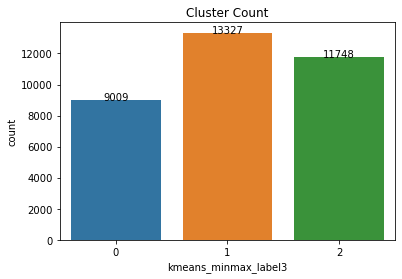

In [39]:
ax=sns.countplot(x=cluster_df.kmeans_minmax_label3)
for index, row in pd.DataFrame(cluster_df['kmeans_minmax_label3'].value_counts()).iterrows():
    ax.text(index,row.values[0], str(round(row.values[0])),color='black', ha="center")
    #print(index,row.values[0])
plt.title('Cluster Count')
plt.show()

In [40]:
num_cols=['credit_score', 'yearly_income', 'desired_amount', 'existing_loan_cnt',
       'existing_loan_amt', 'time', 'cluster', 'count']
ctg_cols=cluster_df.select_dtypes(include=['category']).columns

print('Numerical Cols=',num_cols)
print('Categorical Cols=',ctg_cols)

Numerical Cols= ['credit_score', 'yearly_income', 'desired_amount', 'existing_loan_cnt', 'existing_loan_amt', 'time', 'cluster', 'count']
Categorical Cols= Index(['birth_year', 'gender'], dtype='object')


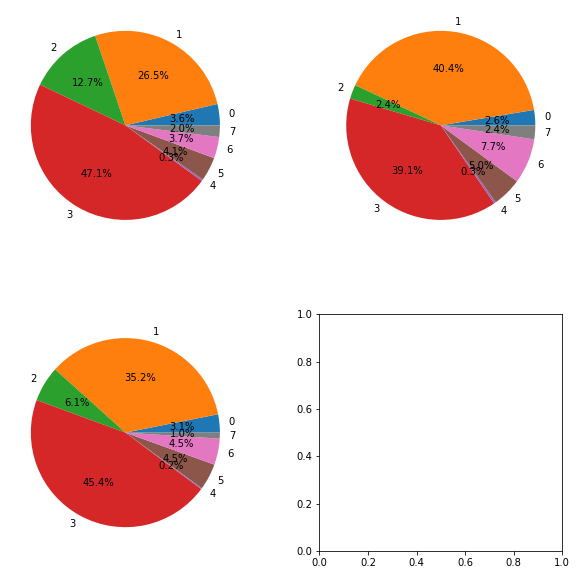

In [41]:
## 범주형 그래프
# 목적별
#cluster별 purpose비율
import seaborn as sns
import matplotlib.pyplot as plt

f, axes = plt.subplots(2, 2)
# 격자 크기 설정
f.set_size_inches((10, 10))
# 격자 여백 설정
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

cluster0=cluster_df[cluster_df['kmeans_minmax_label3']==0]
dt0=cluster0.groupby(['purpose'])['purpose'].count()
group_name=dt0.index
group_size=dt0.values
axes[0,0].pie(group_size, labels=group_name, autopct='%1.1f%%')

cluster1=cluster_df[cluster_df['kmeans_minmax_label3']==1]
dt1=cluster1.groupby(['purpose'])['purpose'].count()
group_name=dt1.index
group_size=dt1.values
axes[0,1].pie(group_size, labels=group_name, autopct='%1.1f%%')

cluster2=cluster_df[cluster_df['kmeans_minmax_label3']==2]
dt2=cluster2.groupby(['purpose'])['purpose'].count()
group_name=dt2.index
group_size=dt2.values
axes[1,0].pie(group_size, labels=group_name, autopct='%1.1f%%')


plt.show()

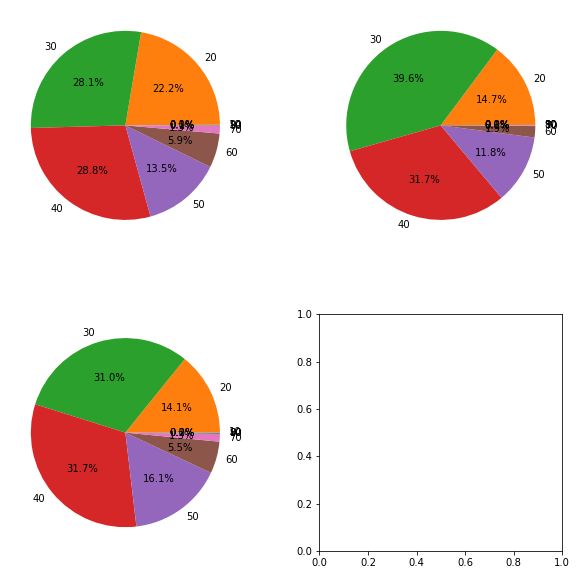

In [42]:
## 범주형 그래프
# 나이대
#cluster별 purpose비율
import seaborn as sns
import matplotlib.pyplot as plt

f, axes = plt.subplots(2, 2)
# 격자 크기 설정
f.set_size_inches((10, 10))
# 격자 여백 설정
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

cluster0=cluster_df[cluster_df['kmeans_minmax_label3']==0]
dt0=cluster0.groupby(['birth_year'])['birth_year'].count()
group_name=dt0.index
group_size=dt0.values
axes[0,0].pie(group_size, labels=group_name, autopct='%1.1f%%')

cluster1=cluster_df[cluster_df['kmeans_minmax_label3']==1]
dt1=cluster1.groupby(['birth_year'])['birth_year'].count()
group_name=dt1.index
group_size=dt1.values
axes[0,1].pie(group_size, labels=group_name, autopct='%1.1f%%')

cluster2=cluster_df[cluster_df['kmeans_minmax_label3']==2]
dt2=cluster2.groupby(['birth_year'])['birth_year'].count()
group_name=dt2.index
group_size=dt2.values
axes[1,0].pie(group_size, labels=group_name, autopct='%1.1f%%')


plt.show()

In [43]:
cluster_df.to_csv('cluster_df.csv')